# RGB IMAGE COMPRESSION WITH DCT

Comparing pixel difference curves of a sample of a few images

-----------

### Artash Nath, Pay-Elec Team, UTAT

----------------

In [1]:
# Importing Required Libararies

from scipy.fftpack import dct, idct # To perform DCT And Inverse DCT
from skimage.io import imread # Read Image File
import numpy as np # Numpy to perform mathematical operations on images/arrays
import matplotlib.pylab as plt # Plot results and display images

In [2]:
# Calculates multidimension Discrete Cosine Transformation on an image
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho') #Converts an array into an array of DCT Coefficients of same shape

# Calculates Inverse Diicrete Cosine Transformation on an image
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho') # Reverses an array of DCT Coefficients back into an image

In [3]:
# Calculate (%) simmilarity between 2 arrays of same size

def image_simmilarity(imageA, imageB):
    
    diff = abs(imageA - imageB) # Find difference between 2 images
    
    err = diff.mean() # Calculate Average Difference between those 2 images
    
    return err

In [4]:

# Function that takes an image, converts it into DCT Coefficients. Keeping only percentage "thresh" of coefficients
# And reversing kept coefficients back into image

def DCTrecreate(im, thresh, display = False):
    
    DCT =  dct2(im) # Calculates and Creates an array of DCT Coefficients equal to the size of the original image
    thresh2 = np.sort(abs((DCT.ravel())))[int(DCT.size*(1-thresh))] # Determines lowest DCT Coeff values to keep based on "thresh"
    dct_thresh = DCT * (abs(DCT) > (thresh2)) # Removes all DCT Vales lower then determines threshold from DCT Coeff. Array
    P = round((np.sum(abs(DCT) > (thresh2))/im.size)*100, 2) # Re-Calculates threshold of pixels discarded for verification
    r_im = idct2(dct_thresh) # Reverses array of kept DCT Coeffs. Back into a reconstructed image
    r_im =r_im.astype(np.uint8)
    simm = image_simmilarity(im, r_im)
    #Display Orginal VS Recreated Image if Display==True
    if display == True:
        fig, axs = plt.subplots(1, 2, figsize = (16,8))
        axs[0].imshow(im)
        axs[0].axis('on')
        axs[0].set_title("Original Image")

        axs[1].imshow(r_im)
        axs[1].axis('off')
        title = "Reconsturcted Image ("+str(P)+"% Coefficients) "+ "| Simmilarity : "+str(int(simm))
        axs[1].set_title(title)
        plt.show()
        
    #Return recreated image array
    
    
    else:
        return r_im, simm

In [5]:
im1 = imread('rocket.jpg')[:1000, :1000] # Read Sample Image
im2 = imread('sattelite-img.jpg')[:1000, :1000] # Read Sample Image
im3 = imread('deepspace.jpg')[:1000, :1000] # Read Sample Image
im4 = imread('toronto.jpg')[:1000, :1000] # Read Sample Image



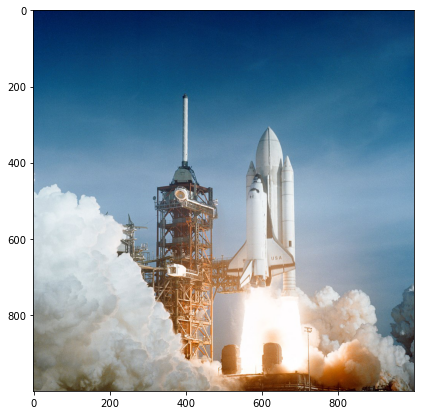

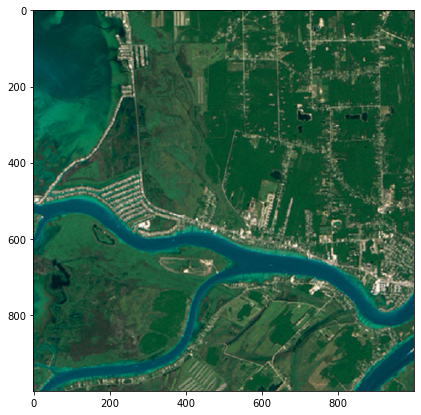

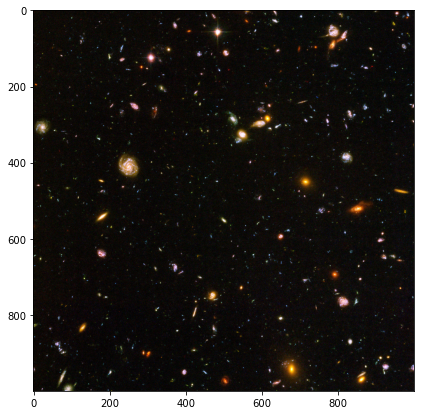

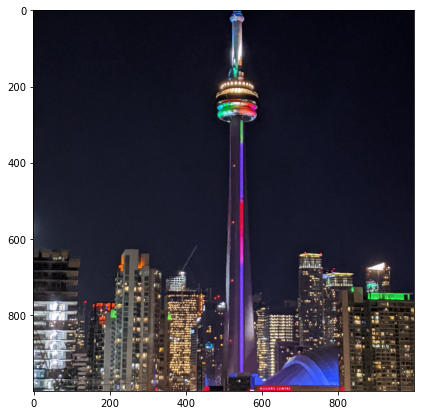

In [11]:
plt.figure(figsize=(7,7))
plt.imshow(im1)
plt.show()
plt.figure(figsize=(7,7))
plt.imshow(im2)
plt.show()
plt.figure(figsize=(7,7))
plt.imshow(im3)
plt.show()
plt.figure(figsize=(7,7))
plt.imshow(im4)

In [7]:
thresholds = np.flip(np.array(list(range(1, 100))))

simmilarities1 = []
simmilarities2 = []
simmilarities3 = []
simmilarities4 = []

for i in thresholds:
    simmilarities1.append((DCTrecreate(im1, i/100, display=False))[1])
    
print("Image 1 done")

for i in thresholds:
    simmilarities2.append((DCTrecreate(im2, i/100, display=False))[1])
    
print("Image 2 done")

for i in thresholds:
    simmilarities3.append((DCTrecreate(im3, i/100, display=False))[1])

print("Image 3 done")

for i in thresholds:
    simmilarities4.append((DCTrecreate(im4, i/100, display=False))[1])
    
print("Image 4 done")

Image 1 done
Image 2 done
Image 3 done
Image 4 done


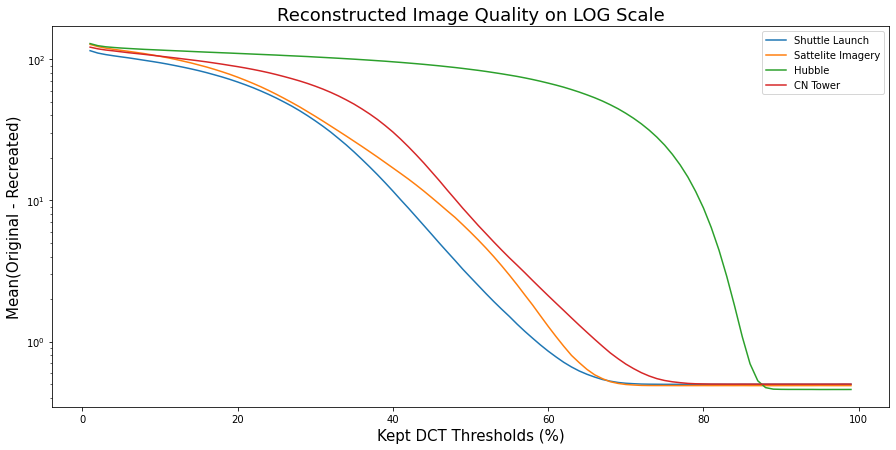

In [12]:
plt.figure(figsize=(15,7))

plt.plot(thresholds, simmilarities1)
plt.plot(thresholds, simmilarities2)
plt.plot(thresholds, simmilarities3)
plt.plot(thresholds, simmilarities4)

plt.legend(['Shuttle Launch', 'Sattelite Imagery', "Hubble", "CN Tower"])
plt.xlabel("Kept DCT Thresholds (%)", size = 15)
plt.ylabel("Mean(Original - Recreated)", size = 15)
plt.title("Reconstructed Image Quality on LOG Scale", size = 18)
plt.yscale('log')

Text(0.5, 1.0, 'Reconstructed Image Quality')

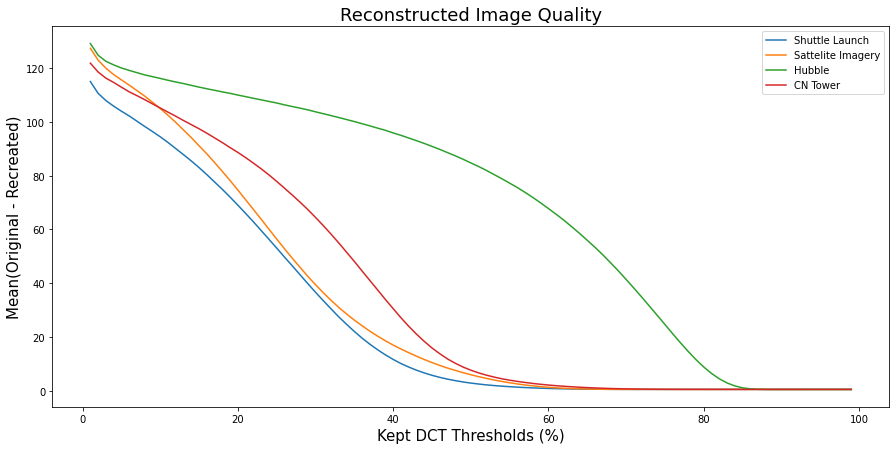

In [13]:
plt.figure(figsize=(15,7))

plt.plot(thresholds, simmilarities1)
plt.plot(thresholds, simmilarities2)
plt.plot(thresholds, simmilarities3)
plt.plot(thresholds, simmilarities4)

plt.legend(['Shuttle Launch', 'Sattelite Imagery', "Hubble", "CN Tower"])
plt.xlabel("Kept DCT Thresholds (%)", size = 15)
plt.ylabel("Mean(Original - Recreated)", size = 15)
plt.title("Reconstructed Image Quality", size = 18)

Text(0.5, 1.0, 'Reconstructed Image Quality on LOG Scale')

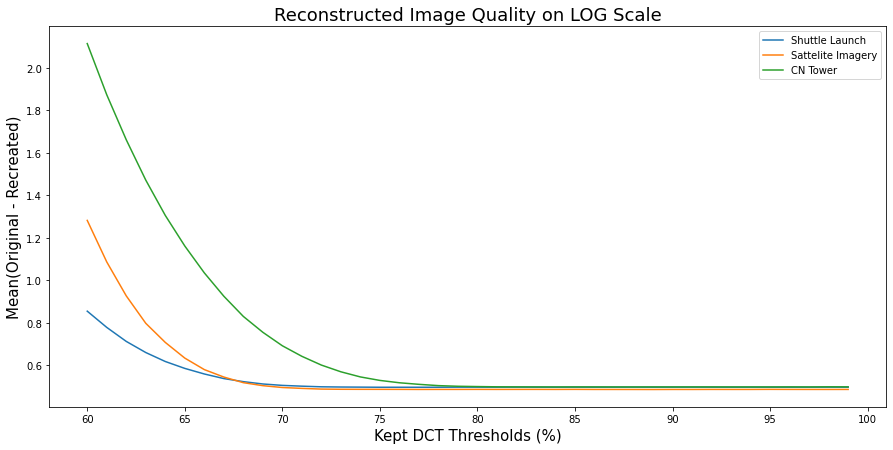

In [23]:
plt.figure(figsize=(15,7))

plt.plot(thresholds[:40], simmilarities1[:40])
plt.plot(thresholds[:40], simmilarities2[:40])
#plt.plot(thresholds[:60], simmilarities3[:60])
plt.plot(thresholds[:40], simmilarities4[:40])

plt.legend(['Shuttle Launch', 'Sattelite Imagery',"CN Tower"])
plt.xlabel("Kept DCT Thresholds (%)", size = 15)
plt.ylabel("Mean(Original - Recreated)", size = 15)
plt.title("Reconstructed Image Quality on LOG Scale", size = 18)

Text(0.5, 1.0, 'Reconstructed Image Quality on LOG Scale')

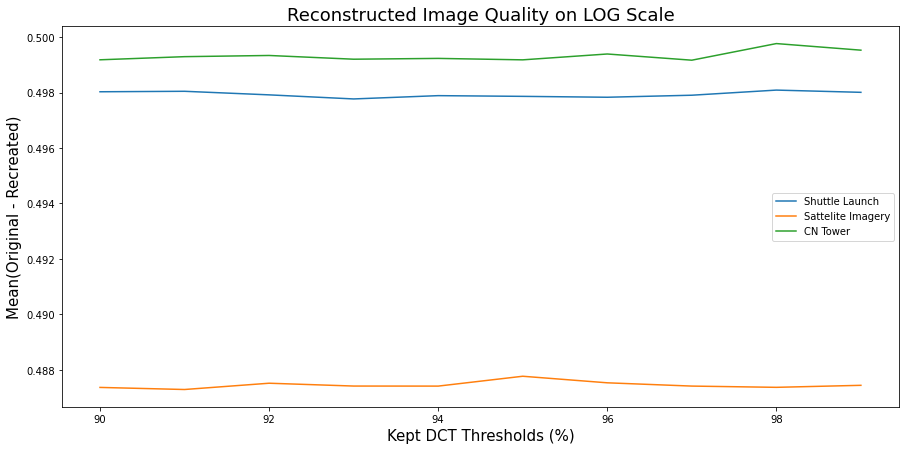

In [24]:
plt.figure(figsize=(15,7))

plt.plot(thresholds[:10], simmilarities1[:10])
plt.plot(thresholds[:10], simmilarities2[:10])
#plt.plot(thresholds[:90], simmilarities3[:60])
plt.plot(thresholds[:10], simmilarities4[:10])

plt.legend(['Shuttle Launch', 'Sattelite Imagery',"CN Tower"])
plt.xlabel("Kept DCT Thresholds (%)", size = 15)
plt.ylabel("Mean(Original - Recreated)", size = 15)
plt.title("Reconstructed Image Quality on LOG Scale", size = 18)